In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (1153).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (352).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (179).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (672).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (501).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (405).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (436).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (883).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (564).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (936).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (837).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (421).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (1031).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (221).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVI


/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (664).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (894).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (978).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (176).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (337).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (295).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (8).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (1066).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (262).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (77).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (49).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (1061).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (1062).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/Non-Covid (572).png
/kaggle/input/sarscov2-ctscan-dataset/non-COVID/

/kaggle/input/sarscov2-ctscan-dataset/COVID/Covid (230).png
/kaggle/input/sarscov2-ctscan-dataset/COVID/Covid (1195).png
/kaggle/input/sarscov2-ctscan-dataset/COVID/Covid (182).png
/kaggle/input/sarscov2-ctscan-dataset/COVID/Covid (817).png
/kaggle/input/sarscov2-ctscan-dataset/COVID/Covid (631).png
/kaggle/input/sarscov2-ctscan-dataset/COVID/Covid (369).png
/kaggle/input/sarscov2-ctscan-dataset/COVID/Covid (777).png
/kaggle/input/sarscov2-ctscan-dataset/COVID/Covid (1249).png
/kaggle/input/sarscov2-ctscan-dataset/COVID/Covid (366).png
/kaggle/input/sarscov2-ctscan-dataset/COVID/Covid (1139).png
/kaggle/input/sarscov2-ctscan-dataset/COVID/Covid (152).png
/kaggle/input/sarscov2-ctscan-dataset/COVID/Covid (179).png
/kaggle/input/sarscov2-ctscan-dataset/COVID/Covid (1004).png
/kaggle/input/sarscov2-ctscan-dataset/COVID/Covid (297).png
/kaggle/input/sarscov2-ctscan-dataset/COVID/Covid (1219).png
/kaggle/input/sarscov2-ctscan-dataset/COVID/Covid (556).png
/kaggle/input/sarscov2-ctscan-datas

## Setup

In [2]:
# Setup

import time
import os
import copy
import torch
import torchvision
import zipfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
import torchvision.io as io
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision.datasets.utils import download_url
from torch.utils.data import Dataset, DataLoader,TensorDataset,random_split,SubsetRandomSampler, ConcatDataset
import torchvision.transforms as tt
from torchvision.utils import make_grid
from torch.utils.data import TensorDataset
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision import datasets, models, transforms
from PIL import Image
import torchvision.transforms.functional as TF
import torch.optim as opt
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
import itertools
from tqdm.notebook import tqdm
from torch.autograd import Variable
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

## Data

In [3]:
Data_Directory="../input/sarscov2-ctscan-dataset"

# Data directory and classes
data_dir="../input/sarscov2-ctscan-dataset"

print("Folders in Data set : ",os.listdir(data_dir))
classes=os.listdir(data_dir)
print("Classes : ",classes)



print("abnormal images : ",len(os.listdir(data_dir+'/COVID')))
print("normal images : ",len(os.listdir(data_dir+'/non-COVID')))

Folders in Data set :  ['non-COVID', 'COVID']
Classes :  ['non-COVID', 'COVID']
abnormal images :  1252
normal images :  1229


In [4]:
## Split into train,val,test

!pip install split-folders

In [5]:
import splitfolders
splitfolders.ratio(data_dir,output="output",seed=1337 ,ratio=(.9,.1))

Copying files: 0 files [00:00, ? files/s]

Copying files: 1 files [00:00,  2.58 files/s]

Copying files: 14 files [00:00, 36.83 files/s]

Copying files: 29 files [00:00, 67.11 files/s]

Copying files: 44 files [00:00, 89.69 files/s]

Copying files: 57 files [00:00, 98.36 files/s]

Copying files: 71 files [00:00, 108.50 files/s]

Copying files: 87 files [00:01, 122.02 files/s]

Copying files: 103 files [00:01, 129.43 files/s]

Copying files: 117 files [00:01, 131.62 files/s]

Copying files: 131 files [00:01, 127.97 files/s]

Copying files: 145 files [00:01, 127.57 files/s]

Copying files: 160 files [00:01, 130.99 files/s]

Copying files: 174 files [00:01, 132.58 files/s]

Copying files: 190 files [00:01, 138.63 files/s]

Copying files: 205 files [00:01, 139.61 files/s]

Copying files: 221 files [00:01, 143.51 files/s]

Copying files: 237 files [00:02, 147.97 files/s]

Copying files: 253 files [00:02, 148.67 files/s]

Copying files: 268 files [00:02, 148.51 files/s]

Copying files: 283 files [00:02, 144.35 files/s]

Copying files: 298 files [00:02, 143.67 files/s]

Copying files: 313 files [00:02, 143.83 files/s]

Copying files: 328 files [00:02, 143.91 files/s]

Copying files: 344 files [00:02, 147.45 files/s]

Copying files: 359 files [00:02, 148.07 files/s]

Copying files: 374 files [00:03, 146.69 files/s]

Copying files: 389 files [00:03, 146.56 files/s]

Copying files: 405 files [00:03, 148.07 files/s]

Copying files: 421 files [00:03, 149.53 files/s]

Copying files: 437 files [00:03, 152.18 files/s]

Copying files: 453 files [00:03, 152.21 files/s]

Copying files: 469 files [00:03, 148.12 files/s]

Copying files: 485 files [00:03, 148.95 files/s]

Copying files: 500 files [00:03, 147.79 files/s]

Copying files: 515 files [00:03, 145.80 files/s]

Copying files: 530 files [00:04, 145.30 files/s]

Copying files: 545 files [00:04, 145.34 files/s]

Copying files: 562 files [00:04, 150.36 files/s]

Copying files: 578 files [00:04, 149.69 files/s]

Copying files: 593 files [00:04, 145.92 files/s]

Copying files: 608 files [00:04, 145.25 files/s]

Copying files: 624 files [00:04, 145.85 files/s]

Copying files: 639 files [00:04, 142.43 files/s]

Copying files: 655 files [00:04, 146.29 files/s]

Copying files: 670 files [00:05, 145.08 files/s]

Copying files: 685 files [00:05, 145.53 files/s]

Copying files: 701 files [00:05, 149.30 files/s]

Copying files: 716 files [00:05, 149.21 files/s]

Copying files: 732 files [00:05, 150.88 files/s]

Copying files: 748 files [00:05, 152.10 files/s]

Copying files: 764 files [00:05, 153.78 files/s]

Copying files: 780 files [00:05, 154.41 files/s]

Copying files: 796 files [00:05, 155.78 files/s]

Copying files: 812 files [00:05, 153.85 files/s]

Copying files: 828 files [00:06, 152.29 files/s]

Copying files: 844 files [00:06, 150.33 files/s]

Copying files: 860 files [00:06, 148.86 files/s]

Copying files: 876 files [00:06, 149.48 files/s]

Copying files: 891 files [00:06, 149.55 files/s]

Copying files: 906 files [00:06, 149.30 files/s]

Copying files: 921 files [00:06, 147.43 files/s]

Copying files: 936 files [00:06, 145.05 files/s]

Copying files: 951 files [00:06, 144.75 files/s]

Copying files: 966 files [00:07, 144.30 files/s]

Copying files: 981 files [00:07, 145.01 files/s]

Copying files: 997 files [00:07, 147.88 files/s]

Copying files: 1012 files [00:07, 146.96 files/s]

Copying files: 1027 files [00:07, 146.66 files/s]

Copying files: 1042 files [00:07, 146.79 files/s]

Copying files: 1058 files [00:07, 149.99 files/s]

Copying files: 1074 files [00:07, 151.51 files/s]

Copying files: 1090 files [00:07, 150.70 files/s]

Copying files: 1106 files [00:07, 148.49 files/s]

Copying files: 1122 files [00:08, 149.35 files/s]

Copying files: 1137 files [00:08, 148.34 files/s]

Copying files: 1152 files [00:08, 145.89 files/s]

Copying files: 1167 files [00:08, 146.52 files/s]

Copying files: 1183 files [00:08, 150.34 files/s]

Copying files: 1199 files [00:08, 153.06 files/s]

Copying files: 1215 files [00:08, 151.70 files/s]

Copying files: 1231 files [00:09, 73.26 files/s] 

Copying files: 1245 files [00:09, 83.85 files/s]

Copying files: 1261 files [00:09, 97.58 files/s]

Copying files: 1277 files [00:09, 110.81 files/s]

Copying files: 1292 files [00:09, 118.34 files/s]

Copying files: 1308 files [00:09, 127.09 files/s]

Copying files: 1324 files [00:09, 135.14 files/s]

Copying files: 1339 files [00:09, 138.29 files/s]

Copying files: 1354 files [00:09, 138.38 files/s]

Copying files: 1370 files [00:10, 143.06 files/s]

Copying files: 1385 files [00:10, 142.81 files/s]

Copying files: 1400 files [00:10, 144.02 files/s]

Copying files: 1416 files [00:10, 145.76 files/s]

Copying files: 1431 files [00:10, 146.38 files/s]

Copying files: 1446 files [00:10, 147.41 files/s]

Copying files: 1463 files [00:10, 153.90 files/s]

Copying files: 1480 files [00:10, 156.82 files/s]

Copying files: 1497 files [00:10, 158.04 files/s]

Copying files: 1513 files [00:11, 156.50 files/s]

Copying files: 1530 files [00:11, 159.36 files/s]

Copying files: 1546 files [00:11, 156.25 files/s]

Copying files: 1563 files [00:11, 158.53 files/s]

Copying files: 1579 files [00:11, 146.82 files/s]

Copying files: 1596 files [00:11, 152.14 files/s]

Copying files: 1613 files [00:11, 155.68 files/s]

Copying files: 1630 files [00:11, 157.26 files/s]

Copying files: 1647 files [00:11, 158.44 files/s]

Copying files: 1664 files [00:11, 159.72 files/s]

Copying files: 1681 files [00:12, 162.42 files/s]

Copying files: 1698 files [00:12, 164.41 files/s]

Copying files: 1715 files [00:12, 163.59 files/s]

Copying files: 1733 files [00:12, 166.61 files/s]

Copying files: 1750 files [00:12, 167.02 files/s]

Copying files: 1767 files [00:12, 163.53 files/s]

Copying files: 1784 files [00:12, 163.76 files/s]

Copying files: 1802 files [00:12, 165.40 files/s]

Copying files: 1820 files [00:12, 167.38 files/s]

Copying files: 1837 files [00:13, 164.88 files/s]

Copying files: 1854 files [00:13, 162.36 files/s]

Copying files: 1871 files [00:13, 159.09 files/s]

Copying files: 1887 files [00:13, 156.10 files/s]

Copying files: 1903 files [00:13, 152.13 files/s]

Copying files: 1919 files [00:13, 152.26 files/s]

Copying files: 1935 files [00:13, 148.92 files/s]

Copying files: 1950 files [00:13, 136.81 files/s]

Copying files: 1966 files [00:13, 139.96 files/s]

Copying files: 1981 files [00:14, 137.28 files/s]

Copying files: 1996 files [00:14, 138.21 files/s]

Copying files: 2013 files [00:14, 144.00 files/s]

Copying files: 2028 files [00:14, 144.00 files/s]

Copying files: 2043 files [00:14, 144.27 files/s]

Copying files: 2060 files [00:14, 147.69 files/s]

Copying files: 2076 files [00:14, 150.24 files/s]

Copying files: 2092 files [00:14, 151.87 files/s]

Copying files: 2108 files [00:14, 151.17 files/s]

Copying files: 2124 files [00:14, 147.95 files/s]

Copying files: 2140 files [00:15, 149.46 files/s]

Copying files: 2155 files [00:15, 147.78 files/s]

Copying files: 2170 files [00:15, 146.02 files/s]

Copying files: 2185 files [00:15, 145.51 files/s]

Copying files: 2201 files [00:15, 146.62 files/s]

Copying files: 2217 files [00:15, 150.06 files/s]

Copying files: 2233 files [00:15, 149.77 files/s]

Copying files: 2249 files [00:15, 152.06 files/s]

Copying files: 2266 files [00:15, 155.77 files/s]

Copying files: 2282 files [00:16, 155.19 files/s]

Copying files: 2298 files [00:16, 154.84 files/s]

Copying files: 2314 files [00:16, 151.39 files/s]

Copying files: 2331 files [00:16, 154.32 files/s]

Copying files: 2347 files [00:16, 154.24 files/s]

Copying files: 2363 files [00:16, 155.74 files/s]

Copying files: 2379 files [00:16, 155.00 files/s]

Copying files: 2395 files [00:16, 155.34 files/s]

Copying files: 2411 files [00:16, 154.27 files/s]

Copying files: 2428 files [00:16, 158.19 files/s]

Copying files: 2444 files [00:17, 152.23 files/s]

Copying files: 2460 files [00:17, 150.94 files/s]

Copying files: 2477 files [00:17, 154.00 files/s]

Copying files: 2481 files [00:17, 143.15 files/s]

In [6]:
whole_train="./output/train"
splitfolders.ratio(whole_train,output="./output/train-val",seed=1337 ,ratio=(.9,.1))

Copying files: 0 files [00:00, ? files/s]

Copying files: 339 files [00:00, 3383.61 files/s]

Copying files: 735 files [00:00, 3719.16 files/s]

Copying files: 1107 files [00:00, 3430.60 files/s]

Copying files: 1514 files [00:00, 3669.65 files/s]

Copying files: 1930 files [00:00, 3837.89 files/s]

Copying files: 2232 files [00:00, 3770.30 files/s]

In [7]:
train_ds_path="./output/train-val/train"
val_ds_path="./output/train-val/val"
test_ds_path="./output/val"
full_ds_path="./output/train"



print("train images : ",len(os.listdir(train_ds_path+'/COVID'))+len(os.listdir(train_ds_path+'/non-COVID')))
print("val images : ",len(os.listdir(val_ds_path+'/COVID'))+len(os.listdir(val_ds_path+'/non-COVID')))
print("test images : ",len(os.listdir(test_ds_path+'/COVID'))+len(os.listdir(test_ds_path+'/non-COVID')))
print("whole training images : ",len(os.listdir(full_ds_path+'/COVID'))+len(os.listdir(full_ds_path+'/non-COVID')))

print("\n")
print("abnormal train images : ",len(os.listdir(train_ds_path+'/COVID')))
print("abnormal val images : ",len(os.listdir(val_ds_path+'/COVID')))
print("abnormal test images : ",len(os.listdir(test_ds_path+'/COVID')))
print("abnormal whole training images : ",len(os.listdir(full_ds_path+'/COVID')))
print("\n")
print("normal train images : ",len(os.listdir(train_ds_path+'/non-COVID')))
print("normal val images : ",len(os.listdir(val_ds_path+'/non-COVID')))
print("normal test images : ",len(os.listdir(test_ds_path+'/non-COVID')))
print("normal whole training images : ",len(os.listdir(full_ds_path+'/non-COVID')))

train images :  2008
val images :  224
test images :  249
whole training images :  2232


abnormal train images :  1013
abnormal val images :  113
abnormal test images :  126
abnormal whole training images :  1126


normal train images :  995
normal val images :  111
normal test images :  123
normal whole training images :  1106


In [8]:
# Data transforms (normalization & data augmentation)
# Initially PIL Images
# ToTensor: convert PIL Image to tensor and values normalized 0 to 1
train_tfms = tt.Compose([
                         tt.Resize((224,224)),
                        #  tt.RandomRotation(degrees=(-20,20)),
                         tt.ToTensor()])
val_tfms = tt.Compose([
                       tt.Resize((224,224)),
                         tt.ToTensor()])
test_tfms = tt.Compose([
                        tt.Resize((224,224)),
                         tt.ToTensor()])

### Datasets

In [9]:
train_ds=ImageFolder(train_ds_path, transform=train_tfms)
val_ds=ImageFolder(val_ds_path, transform=val_tfms)
test_ds=ImageFolder(test_ds_path, transform=test_tfms)
full_ds=ImageFolder(full_ds_path, transform=train_tfms)
# test_dataset=test_ds

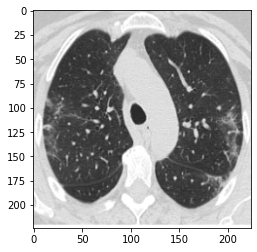

In [10]:
for img,label in train_ds:
  img=img.squeeze_()
  img=img.permute(1,2,0)
  plt.imshow(img,cmap="gray")
  break

### Data Loader

In [11]:
batch_size = 20
# PyTorch data loaders
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size, num_workers=3, pin_memory=True)
test_dl = DataLoader(test_ds, batch_size, num_workers=3, pin_memory=True)
# test_dataloader=test_dl

## Model

### GPU

In [12]:
### GPU

def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')


def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)


class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""

    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

### Plotting

In [13]:
def plot_confusion_matrix(data_loader,nb_classes):
    confusion_matrix = torch.zeros(nb_classes, nb_classes)
    y_pred=[]
    y_true=[]
    with torch.no_grad():
        for i, (inputs, classes) in enumerate(val_dl):
            inputs = inputs.to(device)
            classes = classes.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            outs=preds.detach().cpu().numpy()
            classess=classes.detach().cpu().numpy()
            y_pred=np.concatenate((y_pred,outs),axis=None)
            y_true=np.concatenate((y_true,classess),axis=None)
            for t, p in zip(classes.view(-1), preds.view(-1)):
                    confusion_matrix[t.long(), p.long()] += 1
    array=confusion_matrix(y_pred,y_true)
    classes=os.listdir(data_dir)
    df_cm = pd.DataFrame(array, index =classes,
                  columns = classes)
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True,cmap='Blues',fmt='g')

### Resnet-152

In [14]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item(),dtype=torch.float32)


class ImageClassificationBase(nn.Module):
    def training_step(self,batch, loss_func):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = loss_func(out, labels)  # Calculate loss
        return loss

    def validation_step(self, batch,loss_func):
        images, labels = batch
        out = self(images)                    # Generate predictions
        # print("out : ",out)
        # print("labels : ",labels)
        loss = loss_func(out, labels)   # Calculate loss
        crct_pred = accuracy(out, labels)           # Calculate accuracy
        # print("crct_pred ",crct_pred," batch_size : ",20)
        return {'val_loss': loss.detach(), 'crct_pred': crct_pred, 'batch_size' : len(images)}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_sizes=[x['batch_size'] for x in outputs]
        net_size=sum(batch_sizes)
        crct_preds = [x['crct_pred'] for x in outputs]
        epoch_acc = sum(crct_preds)/net_size
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc}

    def epoch_end(self, epoch, result):
        print("Epoch [{}],{} train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, "last_lr: {:.5f},".format(result['lrs'][-1]) if 'lrs' in result else '', 
            result['train_loss'], result['val_loss'], result['val_acc']))
    def pred(self,img):
      out=self(img)
      return out
    def predictions(self,images):
      outputs=self(images)
      _, preds = torch.max(outputs, dim=1)
      return preds


In [15]:
@torch.no_grad()
def evaluate(model, val_loader,loss_func):
    model.eval()
    outputs = [model.validation_step(batch,loss_func) for batch in val_loader]
    
    return model.validation_epoch_end(outputs)


def fit(epochs, lr, model, train_loader, val_loader,loss_func, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch,loss_func)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader,loss_func)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader,
                  weight_decay=0, grad_clip=None,loss_func=F.cross_entropy, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []

    # Set up custom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up cosine annealing lr learning rate scheduler
    count=0
    for batch in tqdm(train_loader):
      count=count+1
    num_iter=count*epochs
    sched=torch.optim.lr_scheduler.CosineAnnealingLR(optimizer,T_max=num_iter,
                                                     eta_min=0.00001)

    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        lrs = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch,loss_func)
            train_losses.append(loss)
            loss.backward()

            # Gradient clipping
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad()

            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()

        # Validation phase
        result = evaluate(model, val_loader,loss_func)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [16]:
device = get_default_device()
device

device(type='cpu')

In [17]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)

#### With out Freezing

In [18]:
class RESNET_152_WoF(ImageClassificationBase):
    def __init__(self, num_classes,pretrained=True):
        super().__init__()
        # Use a pretrained model
        self.network = models.resnet152(pretrained=pretrained)
        # Replace last layer
        self.network.fc = nn.Linear(self.network.fc.in_features, num_classes)
        for param in self.network.fc.parameters():
          param.requires_grad = True
          
    def forward(self, xb):
        return self.network(xb)

##### Cross Entropy

In [19]:
# Parameters
num_classes=2
epochs = 20
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam
loss_func=F.cross_entropy

# Model
model=RESNET_152_WoF(num_classes)
to_device(model,device)

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth


  0%|          | 0.00/230M [00:00<?, ?B/s]

RESNET_152_WoF(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
   

In [20]:
torch.manual_seed(42)
k=5
num_epochs = 10
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
splits=KFold(n_splits=k,shuffle=True,random_state=42)
foldperf={}

In [21]:
def train_epoch(model,device,dataloader,scheduler,loss_fn=F.cross_entropy,optimizer=torch.optim.Adam,grad_clip=0):

    train_loss,train_correct=0.0,0
    model.train()
    for images, labels in dataloader:

        images,labels = images.to(device),labels.to(device)
        optimizer.zero_grad()
        output = model(images)
        loss = loss_fn(output,labels)
        loss.backward()
        if grad_clip:
          nn.utils.clip_grad_value_(model.parameters(), grad_clip)
        optimizer.step()
        scheduler.step()
        train_loss += loss.item() * images.size(0)
        scores, predictions = torch.max(output.data, 1)
        train_correct += (predictions == labels).sum().item()

    return train_loss,train_correct
  
def valid_epoch(model,num_classes,device,dataloader,loss_fn=F.cross_entropy,grad_clip=0):
  valid_loss, val_correct = 0.0, 0
  y_true=[]
  y_pred=[]
  model.eval()
  for images, labels in dataloader:

      images,labels = images.to(device),labels.to(device)
      output = model(images)
      loss=loss_fn(output,labels)
      valid_loss+=loss.item()*images.size(0)
      scores, predictions = torch.max(output.data,1)
      val_correct+=(predictions == labels).sum().item()
      predictions=predictions.detach().cpu().tolist()
      labels=labels.detach().cpu().tolist()
      y_pred.extend(predictions)
      y_true.extend(labels)

  array=confusion_matrix(y_pred,y_true)
  classes=os.listdir(data_dir)
  df_cm = pd.DataFrame(array, index =classes,
                  columns = classes)
  plt.figure(figsize = (10,7))
  sn.heatmap(df_cm, annot=True,cmap='Blues',fmt='g')
  plt.show()
  
  return valid_loss,val_correct

def cross_validate(model,num_classes,full_ds,opt_func,loss_func,grad_clip):
  foldperf={}
  for fold, (train_idx,val_idx) in enumerate(splits.split(np.arange(len(full_ds)))):

      print('Fold {}'.format(fold + 1))

      train_sampler = SubsetRandomSampler(train_idx)
      test_sampler = SubsetRandomSampler(val_idx)
      train_loader = DataLoader(full_ds, batch_size=batch_size, sampler=train_sampler)
      test_loader = DataLoader(full_ds, batch_size=batch_size, sampler=test_sampler)
    
      device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    
      model.to(device)
      print(loss_func)
      optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
      # Set up cosine annealing lr learning rate scheduler
      count=0
      for batch in tqdm(train_loader):
        count=count+1
      num_iter=count*num_epochs
      sched=torch.optim.lr_scheduler.CosineAnnealingLR(optimizer,T_max=num_iter,
                                                     eta_min=0.00001)

      history = {'train_loss': [], 'test_loss': [],'train_acc':[],'test_acc':[]}

      for epoch in range(num_epochs):
          train_loss, train_correct=train_epoch(model,device,train_loader,sched,loss_func,optimizer,grad_clip)
          test_loss, test_correct=valid_epoch(model,num_classes,device,test_loader,loss_func,grad_clip)

          train_loss = train_loss / len(train_loader.sampler)
          train_acc = train_correct / len(train_loader.sampler) * 100
          test_loss = test_loss / len(test_loader.sampler)
          test_acc = test_correct / len(test_loader.sampler) * 100

          print("Epoch:{}/{} AVG Training Loss:{:.3f} AVG Test Loss:{:.3f} AVG Training Acc {:.2f} % AVG Test Acc {:.2f} %".format(epoch + 1,
                                                                                                             num_epochs,
                                                                                                             train_loss,
                                                                                                             test_loss,
                                                                                                             train_acc,
                                                                                                             test_acc))
          history['train_loss'].append(train_loss)
          history['test_loss'].append(test_loss)
          history['train_acc'].append(train_acc)
          history['test_acc'].append(test_acc)
      
      foldperf['fold{}'.format(fold+1)] = history  

  torch.save(model,'k_cross_CNN.pt')
  return foldperf


def test(model,device,dataloader,test_dataset,loss_fn):
  test_loss, test_correct = 0.0, 0
  model.eval()
  y_true=[]
  y_pred=[]
  for images, labels in dataloader:

      images,labels = images.to(device),labels.to(device)
      output = model(images)
      loss=loss_fn(output,labels)
      test_loss+=loss.item()*images.size(0)
      scores, predictions = torch.max(output.data,1)
      test_correct+=(predictions == labels).sum().item()
      predictions=predictions.detach().cpu().tolist()
      labels=labels.detach().cpu().tolist()
      y_pred.extend(predictions)
      y_true.extend(labels)
    
  test_loss = test_loss / len(test_dataset)
  test_acc = test_correct / len(test_dataset) * 100
  array=confusion_matrix(y_pred,y_true)
  classes=os.listdir(data_dir)
  df_cm = pd.DataFrame(array, index =classes,
                  columns = classes)
  plt.figure(figsize = (10,7))
  sn.heatmap(df_cm, annot=True,cmap='Blues',fmt='g')
  plt.show()

  return test_loss,test_acc

  test_loss = test_loss / len(test_dataset)
  test_acc = test_correct / len(test_dataset) * 100


def cv_results(foldperf):
  testl_f,tl_f,testa_f,ta_f=[],[],[],[]
  testl_fm,tl_fm,testa_fm,ta_fm=[],[],[],[]
  for f in range(1,k+1):

      tl_f.append(np.mean(foldperf['fold{}'.format(f)]['train_loss']))
      testl_f.append(np.mean(foldperf['fold{}'.format(f)]['test_loss']))

      ta_f.append(np.mean(foldperf['fold{}'.format(f)]['train_acc']))
      testa_f.append(np.mean(foldperf['fold{}'.format(f)]['test_acc']))
      tl_fm.append(np.max(foldperf['fold{}'.format(f)]['train_loss']))
      testl_fm.append(np.max(foldperf['fold{}'.format(f)]['test_loss']))

      ta_fm.append(np.max(foldperf['fold{}'.format(f)]['train_acc']))
      testa_fm.append(np.max(foldperf['fold{}'.format(f)]['test_acc']))

  print('Performance of {} fold cross validation'.format(k))
  print("Average Training Loss: {:.3f} \t Average val Loss: {:.3f} \t Average Training Acc: {:.2f} \t Average val Acc: {:.2f}".format(np.mean(tl_f),np.mean(testl_f),np.mean(ta_f),np.mean(testa_f)))  
  print("Max Training Acc: {:.2f} \t Max val Acc: {:.2f}".format(np.max(ta_fm),np.max(testa_fm)))  

Fold 1
<function cross_entropy at 0x7f8f84597830>


  0%|          | 0/90 [00:00<?, ?it/s]

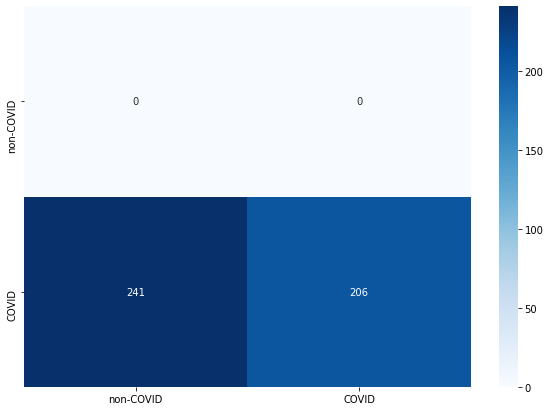

Epoch:1/10 AVG Training Loss:0.806 AVG Test Loss:995.625 AVG Training Acc 51.76 % AVG Test Acc 46.09 %


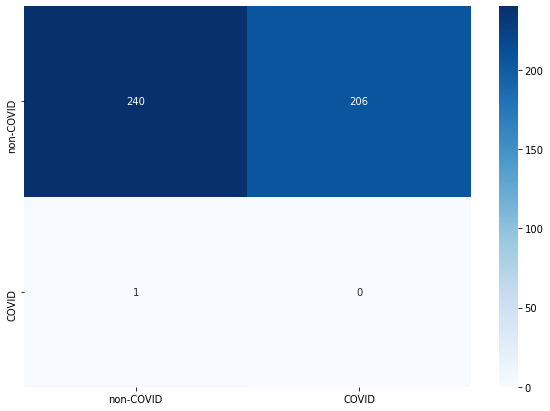

Epoch:2/10 AVG Training Loss:0.689 AVG Test Loss:1.906 AVG Training Acc 59.05 % AVG Test Acc 53.69 %


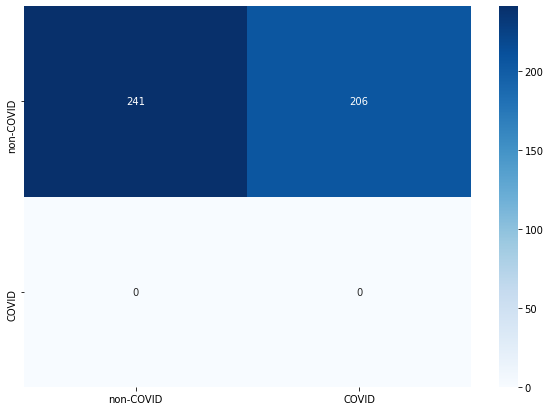

Epoch:3/10 AVG Training Loss:0.429 AVG Test Loss:2.909 AVG Training Acc 81.96 % AVG Test Acc 53.91 %


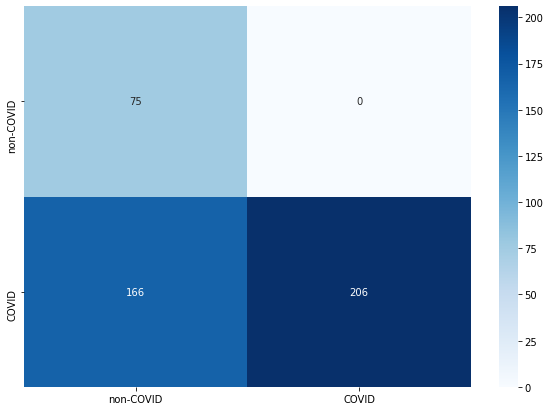

Epoch:4/10 AVG Training Loss:0.402 AVG Test Loss:1.171 AVG Training Acc 82.86 % AVG Test Acc 62.86 %


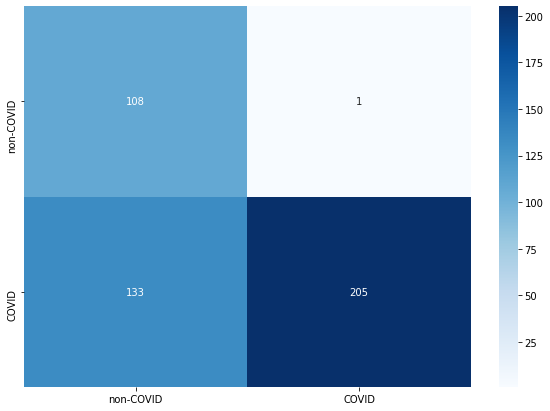

Epoch:5/10 AVG Training Loss:0.339 AVG Test Loss:0.622 AVG Training Acc 86.16 % AVG Test Acc 70.02 %


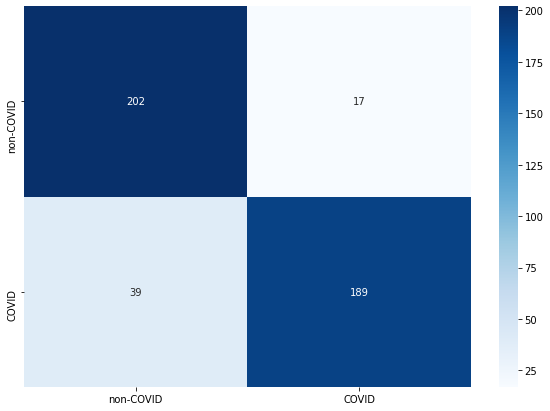

Epoch:6/10 AVG Training Loss:0.320 AVG Test Loss:0.318 AVG Training Acc 87.00 % AVG Test Acc 87.47 %


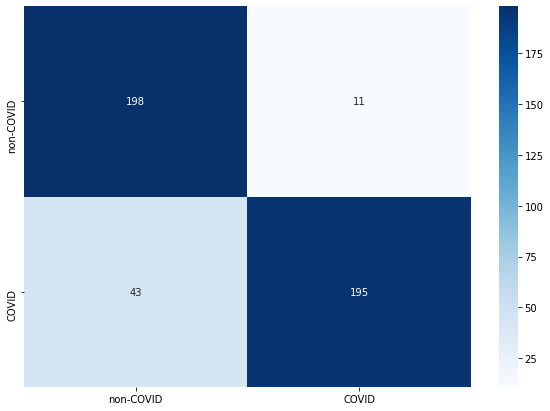

Epoch:7/10 AVG Training Loss:0.312 AVG Test Loss:0.317 AVG Training Acc 87.39 % AVG Test Acc 87.92 %


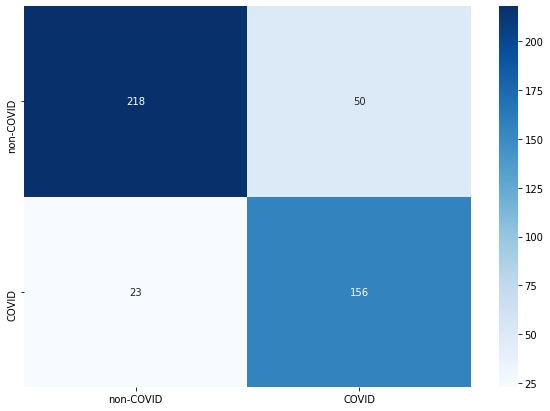

Epoch:8/10 AVG Training Loss:0.289 AVG Test Loss:0.427 AVG Training Acc 88.29 % AVG Test Acc 83.67 %


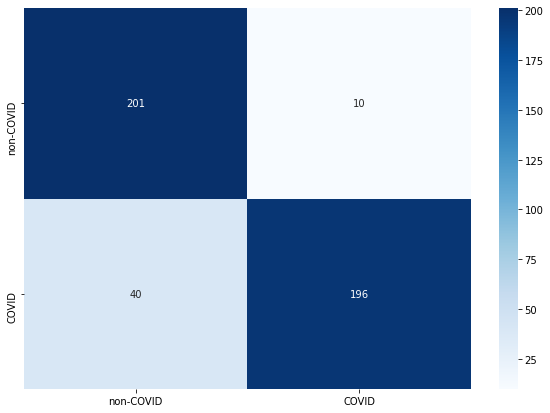

Epoch:9/10 AVG Training Loss:0.250 AVG Test Loss:0.268 AVG Training Acc 90.25 % AVG Test Acc 88.81 %


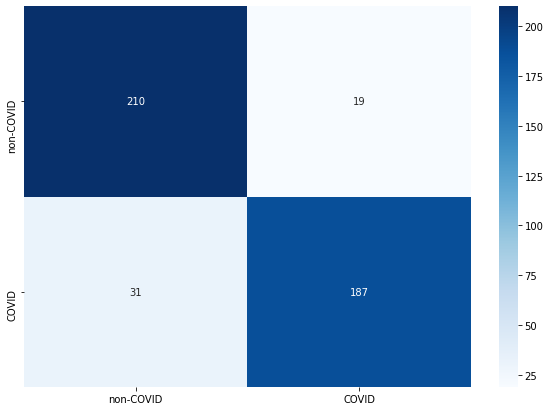

Epoch:10/10 AVG Training Loss:0.223 AVG Test Loss:0.292 AVG Training Acc 91.54 % AVG Test Acc 88.81 %
Fold 2
<function cross_entropy at 0x7f8f84597830>


  0%|          | 0/90 [00:00<?, ?it/s]

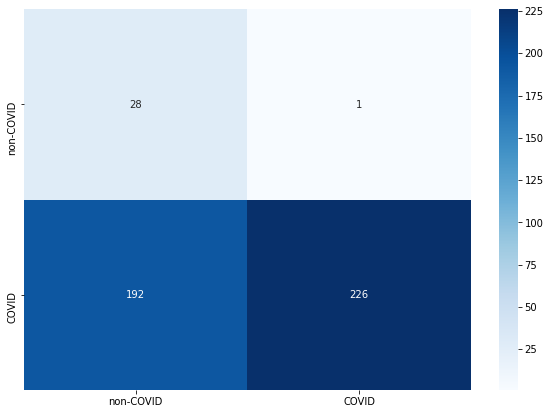

Epoch:1/10 AVG Training Loss:0.519 AVG Test Loss:0.908 AVG Training Acc 74.73 % AVG Test Acc 56.82 %


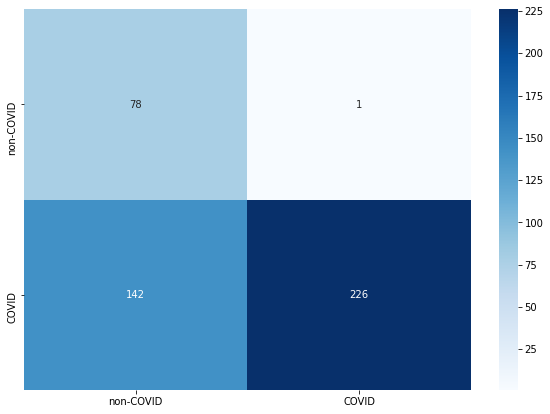

Epoch:2/10 AVG Training Loss:0.455 AVG Test Loss:0.679 AVG Training Acc 79.61 % AVG Test Acc 68.01 %


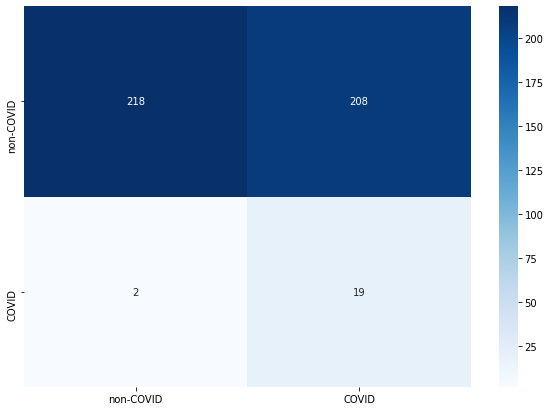

Epoch:3/10 AVG Training Loss:0.429 AVG Test Loss:0.963 AVG Training Acc 81.74 % AVG Test Acc 53.02 %


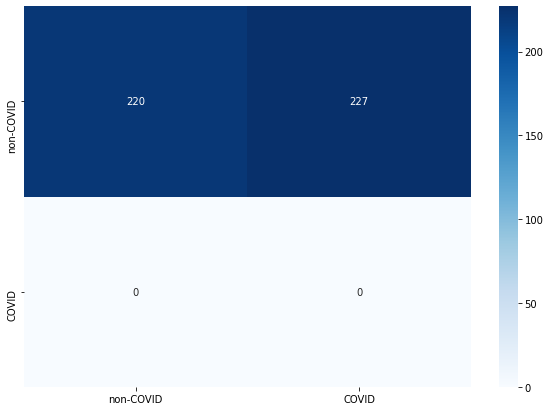

Epoch:4/10 AVG Training Loss:0.377 AVG Test Loss:2.129 AVG Training Acc 83.53 % AVG Test Acc 49.22 %


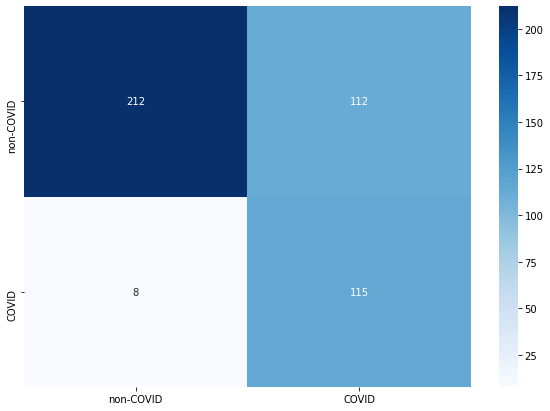

Epoch:5/10 AVG Training Loss:0.365 AVG Test Loss:0.454 AVG Training Acc 85.04 % AVG Test Acc 73.15 %


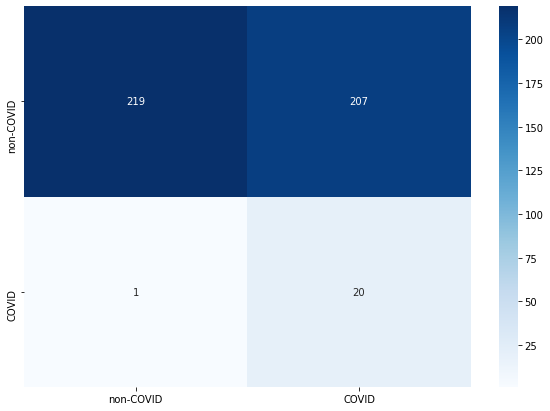

Epoch:6/10 AVG Training Loss:0.339 AVG Test Loss:0.868 AVG Training Acc 86.33 % AVG Test Acc 53.47 %


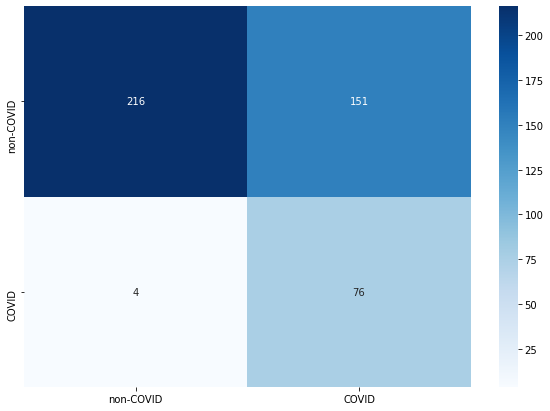

Epoch:7/10 AVG Training Loss:0.289 AVG Test Loss:0.609 AVG Training Acc 88.63 % AVG Test Acc 65.32 %


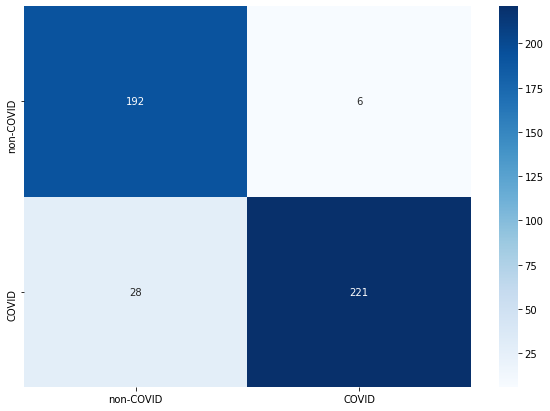

Epoch:8/10 AVG Training Loss:0.282 AVG Test Loss:0.227 AVG Training Acc 89.02 % AVG Test Acc 92.39 %


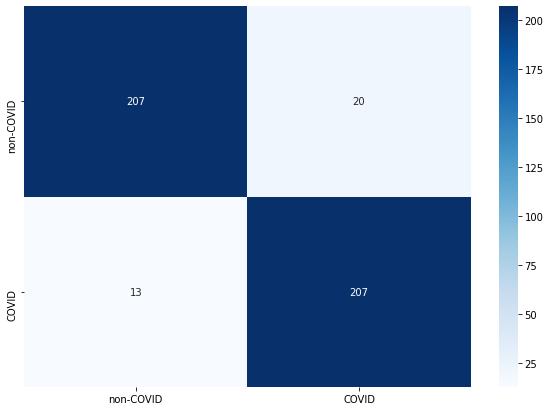

In [22]:
folderperf=cross_validate(model,num_classes,full_ds,opt_func,loss_func,grad_clip)

In [ ]:
print("Resnet-152  With out Freezing Cross Entropy+CV ")
cv_results(folderperf)

In [ ]:
def fold_plot(folderperf,num_rows,suptitle,num_cols=2):
  fig, axes = plt.subplots(num_rows, num_cols,figsize=(15, 15))
  fig.suptitle(suptitle,fontsize=16,y=1.02)
  for fold in range(1,num_rows+1):
    fold_results=folderperf['fold'+str(fold)]
    # 'train_loss': [], 'test_loss': [],'train_acc':[],'test_acc':[]
    train_loss=fold_results['train_loss']
    test_loss=fold_results['test_loss']
    train_acc=fold_results['train_acc']
    test_acc=fold_results['test_acc']
    axes[fold-1][0].plot(train_loss, label='train')
    axes[fold-1][0].plot(test_loss, label='validation')
    axes[fold-1][0].set_title("Train-Validation loss")
    axes[fold-1][0].set_xlabel('num_epochs', fontsize=12)
    axes[fold-1][0].set_ylabel('Loss', fontsize=12)
    axes[fold-1][0].legend(loc='best')

    axes[fold-1][1].plot(train_acc, label='train')
    axes[fold-1][1].plot(test_acc, label='validation')
    axes[fold-1][1].set_title("Train-Validation Acc")
    axes[fold-1][1].set_xlabel('num_epochs', fontsize=12)
    axes[fold-1][1].set_ylabel('Accuracy', fontsize=12)
    axes[fold-1][1].legend(loc='best')
  plt.tight_layout()
  plt.show()

In [ ]:
fold_plot(folderperf,k,"Resnet-152 with out freezing Cross Entropy+CV ")

In [ ]:
# model,device,dataloader,test_dataset,loss_fn=F.cross_entropy,grad_clip=0
loss_func=F.cross_entropy
test_loss,test_acc=test(model,device,test_dl,test_ds,loss_func)
print("Resnet152 - without freezing + Cross Entropy + CV")
print("Test Loss : {:.2f} \t Test Accuracy : {:.2f}".format(test_loss,test_acc))

### Focal Loss

In [ ]:
class FocalLoss(nn.Module):
    def __init__(self, gamma=0, alpha=None, size_average=True):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        if isinstance(alpha,(float,int,int)): self.alpha = torch.Tensor([alpha,1-alpha])
        if isinstance(alpha,list): self.alpha = torch.Tensor(alpha)
        self.size_average = size_average

    def forward(self, input, target):
        if input.dim()>2:
            input = input.view(input.size(0),input.size(1),-1)  # N,C,H,W => N,C,H*W
            input = input.transpose(1,2)    # N,C,H*W => N,H*W,C
            input = input.contiguous().view(-1,input.size(2))   # N,H*W,C => N*H*W,C
        target = target.view(-1,1)

        logpt = F.log_softmax(input)
        logpt = logpt.gather(1,target)
        logpt = logpt.view(-1)
        pt = Variable(logpt.data.exp())

        if self.alpha is not None:
            if self.alpha.type()!=input.data.type():
                self.alpha = self.alpha.type_as(input.data)
            at = self.alpha.gather(0,target.data.view(-1))
            logpt = logpt * Variable(at)

        loss = -1 * (1-pt)**self.gamma * logpt
        if self.size_average: return loss.mean()
        else: return loss.sum()

In [ ]:
# Parameters
num_classes=2
epochs = 20
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam
loss_func=F.cross_entropy
gamma=2
alpha=0.25
k=5



In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
loss_func=FocalLoss(gamma=gamma,alpha=alpha)
splits=KFold(n_splits=k,shuffle=True,random_state=42)

In [ ]:
model=RESNET_152_WoF(num_classes)
to_device(model,device)

In [ ]:
folderperf=cross_validate(model,num_classes,full_ds,opt_func,loss_func,grad_clip)

In [ ]:
print("Resnet-152  With out Freezing Focal Loss+CV ")
cv_results(folderperf)

In [ ]:
fold_plot(folderperf,k,"Resnet-152 with out freezing Focal Loss+CV ")

In [ ]:
# model,device,dataloader,test_dataset,loss_fn=F.cross_entropy,grad_clip=0
loss_func=FocalLoss(gamma=gamma,alpha=alpha)
test_loss,test_acc=test(model,device,test_dl,test_ds,loss_func)
print("Resnet152 - without freezing + focal loss + CV")
print("Test Loss : {:.2f} \t Test Accuracy : {:.2f}".format(test_loss,test_acc))